In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("21-housing.csv")

In [36]:
import math

def plot_all_histograms(df, title_prefix=""):
    num_cols = df.select_dtypes(include=[np.number]).columns
    n_cols = 3
    n_rows = math.ceil(len(num_cols) / n_cols)

    plt.figure(figsize=(5 * n_cols, 4 * n_rows))

    for i, col in enumerate(num_cols, 1):
        plt.subplot(n_rows, n_cols, i)
        sns.histplot(df[col], kde=True, bins=30)
        plt.title(f"{title_prefix}{col}")
        plt.xlabel("")
        plt.ylabel("")

    plt.tight_layout()
    plt.show()
    

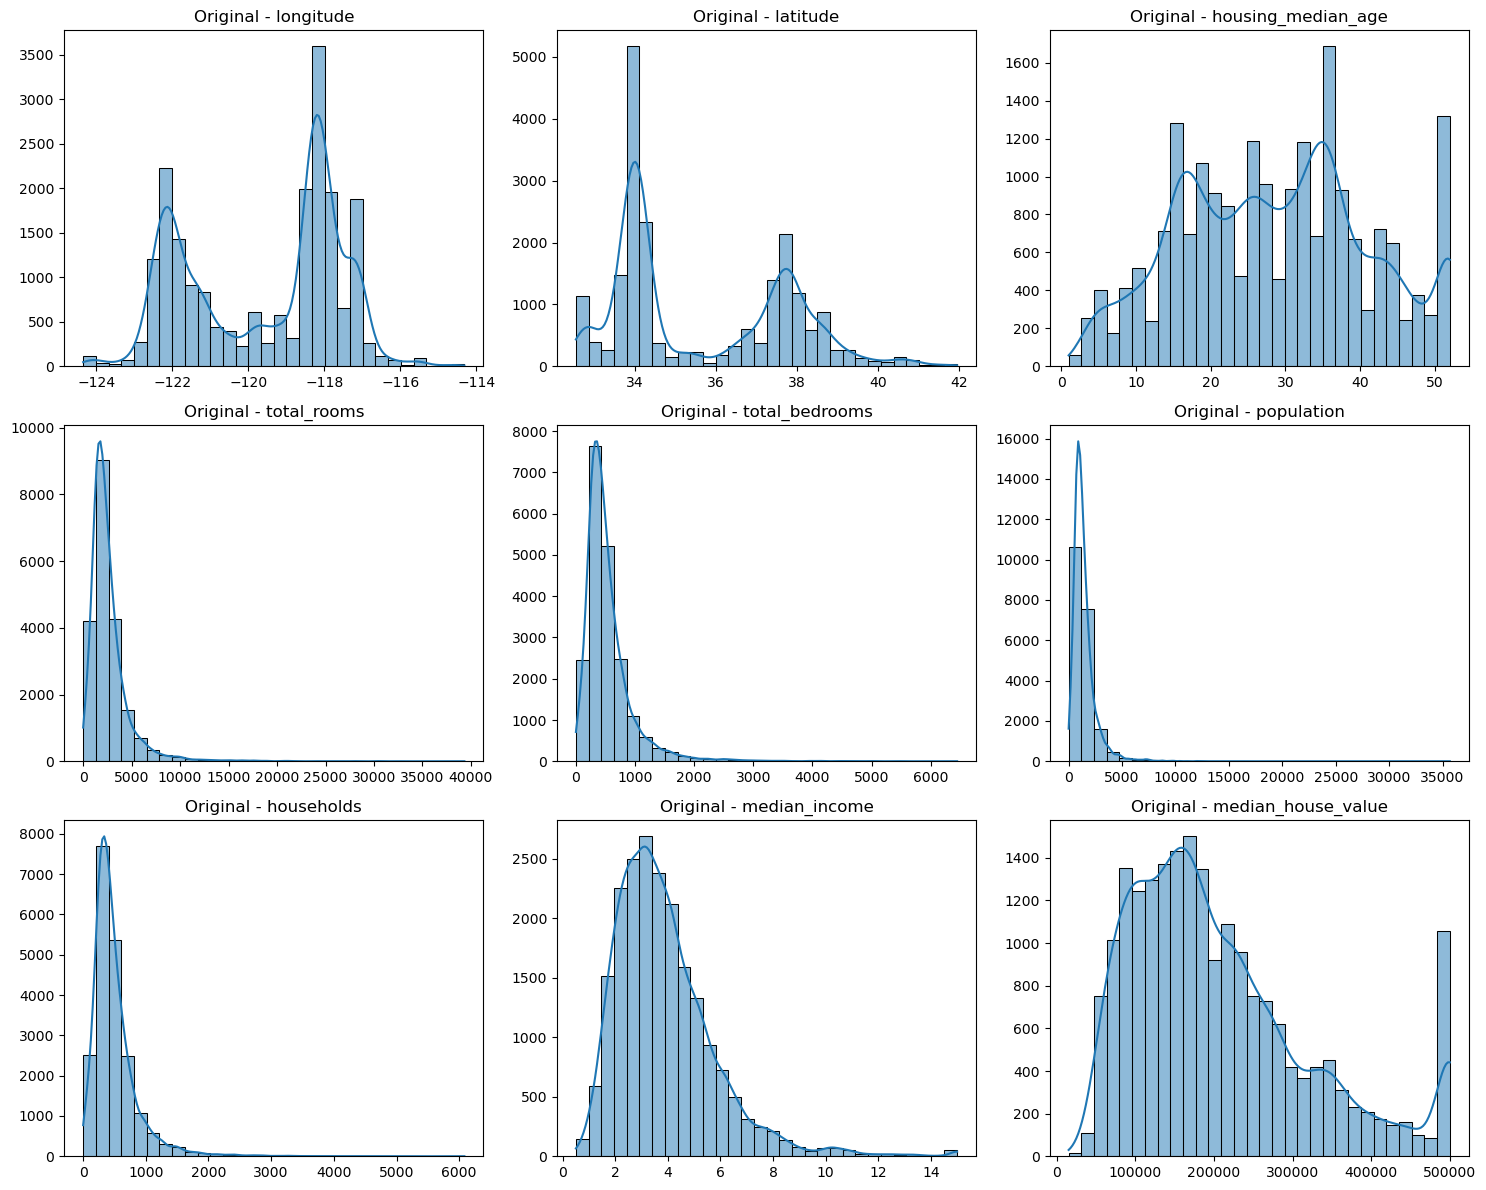

In [37]:
plot_all_histograms(df,title_prefix="Original - ")

In [13]:
def find_outliers_iqr(df, threshold = 1.5):
    outlier_summary = {}

    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        outliers = df[ (df[col] < lower_bound) | (df[col] > upper_bound)]
        
        outlier_summary[col] = {
            "outlier_count" : outliers.shape[0],
            "outlier_percentage" : 100 * outliers.shape[0] / df.shape[0],
            "lower_bound" : lower_bound,
            "upper_bound" : upper_bound
        }
    return pd.DataFrame(outlier_summary)

In [14]:
find_outliers_iqr(df, threshold = 1.5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
outlier_count,0.000,0.00,0.0,1287.000000,1271.000000,1196.000000,1220.000000,681.000000,1071.000000
outlier_percentage,0.000,0.00,0.0,6.235465,6.157946,5.794574,5.910853,3.299419,5.188953
lower_bound,-127.485,28.26,-10.5,-1102.625000,-230.500000,-620.000000,-207.500000,-0.706375,-98087.500000
upper_bound,-112.325,43.38,65.5,5698.375000,1173.500000,3132.000000,1092.500000,8.013025,482412.500000


In [15]:
def remove_outliers_from_column(df,target_col, threshold = 1.5):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    return df[ (df[col] >= lower_bound) & (df[col] <= upper_bound)]

In [16]:
def remove_outliers_from_all_columns(df, threshold = 1.5):
    df_clean = df.copy()
    numeric_cols = df.select_dtypes(include=["float64", "int64"]).columns
    
    for col in numeric_cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - threshold * IQR
        upper_bound = Q3 + threshold * IQR

        df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]
    return df_clean.copy()

In [17]:
print("original data shape: ", df.shape)
df_target_clean = remove_outliers_from_column(df, "median_house_value")
print("only target column cleaning shape: ", df_target_clean.shape)
df_all_clean = remove_outliers_from_all_columns(df)
print("all columns cleaning shape: ", df_all_clean.shape)

original data shape:  (20640, 10)
only target column cleaning shape:  (19569, 10)
all columns cleaning shape:  (17446, 10)


In [18]:
df_target_clean.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        200
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [19]:
df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())

C:\Users\casper\AppData\Local\Temp\ipykernel_644\3688706348.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_target_clean["total_bedrooms"] = df_target_clean["total_bedrooms"].fillna(df_target_clean["total_bedrooms"].median())


In [20]:
df_target_clean = pd.get_dummies(df_target_clean, columns=["ocean_proximity"], drop_first=True)

In [21]:
df_target_clean.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,False,False,True,False
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,False,False,True,False
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,False,False,True,False
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,False,False,True,False
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,False,False,True,False


In [22]:
from scipy.stats import skew

In [24]:
df_target_clean.apply(skew).sort_values(ascending=False)

ocean_proximity_ISLAND        62.536391
population                     4.961787
total_rooms                    4.228578
total_bedrooms                 3.479223
households                     3.406650
ocean_proximity_NEAR BAY       2.560066
ocean_proximity_NEAR OCEAN     2.287085
median_income                  0.889306
median_house_value             0.755894
ocean_proximity_INLAND         0.708083
latitude                       0.455656
housing_median_age             0.070466
longitude                     -0.289687
dtype: float64

In [25]:
X = df_target_clean.drop("median_house_value", axis = 1)
y = df_target_clean["median_house_value"]

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 15)

In [28]:
from sklearn.preprocessing import PowerTransformer

In [29]:
pt_X = PowerTransformer(method="yeo-johnson")

In [30]:
X_train_transformed = pt_X.fit_transform(X_train)
X_test_tranformed = pt_X.transform(X_test)

In [33]:
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN']

In [34]:
X_train_transformed_df = pd.DataFrame(X_train_transformed,columns=columns)

In [35]:
X_train_transformed_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,1.387779e-15,-0.671009,0.486589,0.050535,0.024399,0.358262,0.058133,-0.018646,1.411199,-0.014801,-0.340747,-0.375912
1,2.470246e-15,-1.204064,-0.970340,0.432472,0.522800,0.628352,0.363502,-0.940026,-0.708617,-0.014801,-0.340747,-0.375912
2,2.053913e-15,-0.721618,0.022996,0.305957,0.685602,0.800713,0.621156,-0.907275,1.411199,-0.014801,-0.340747,-0.375912
3,1.471046e-15,-0.972146,-0.296774,0.225063,0.655914,0.434484,0.557085,-0.254036,-0.708617,-0.014801,-0.340747,-0.375912
4,-2.636780e-15,1.423100,-0.056065,-0.548070,-0.448934,-0.944478,-0.697868,-2.133232,1.411199,-0.014801,-0.340747,-0.375912
...,...,...,...,...,...,...,...,...,...,...,...,...
13693,1.221245e-15,-0.696224,-0.056065,-0.355082,-0.693242,-0.593331,-0.599422,1.324302,-0.708617,-0.014801,-0.340747,-0.375912
13694,-2.275957e-15,0.937386,0.637451,0.043574,0.083895,0.721670,0.110812,-0.815634,-0.708617,-0.014801,2.934729,-0.375912
13695,4.024558e-15,-1.599035,0.179499,-1.336357,-1.128894,-0.681751,-1.090558,-1.525335,1.411199,-0.014801,-0.340747,-0.375912
13696,1.026956e-15,-0.779423,0.256983,0.340278,0.660509,0.741306,0.522974,0.058431,-0.708617,-0.014801,-0.340747,-0.375912


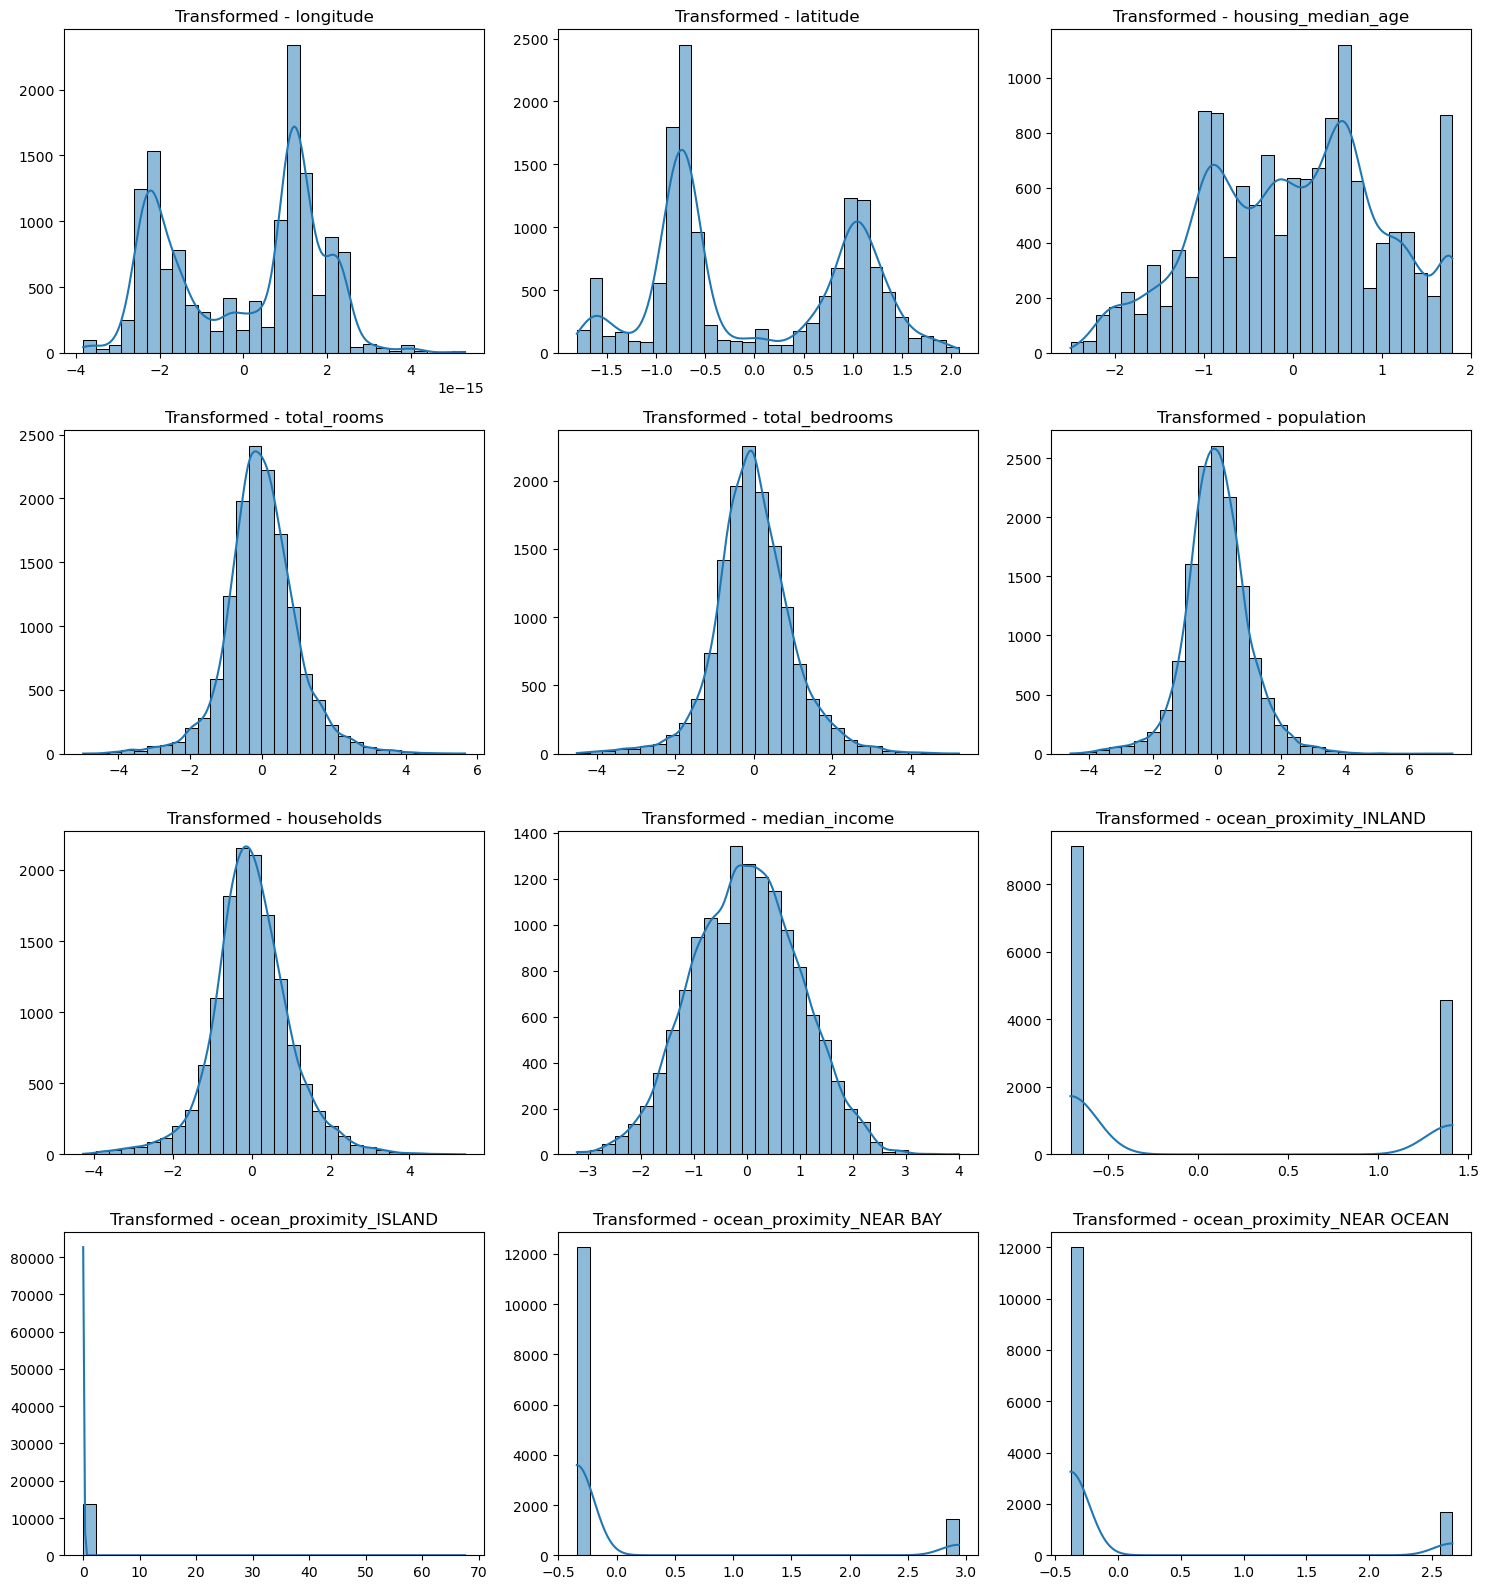

In [38]:
plot_all_histograms(X_train_transformed_df, title_prefix="Transformed - ")

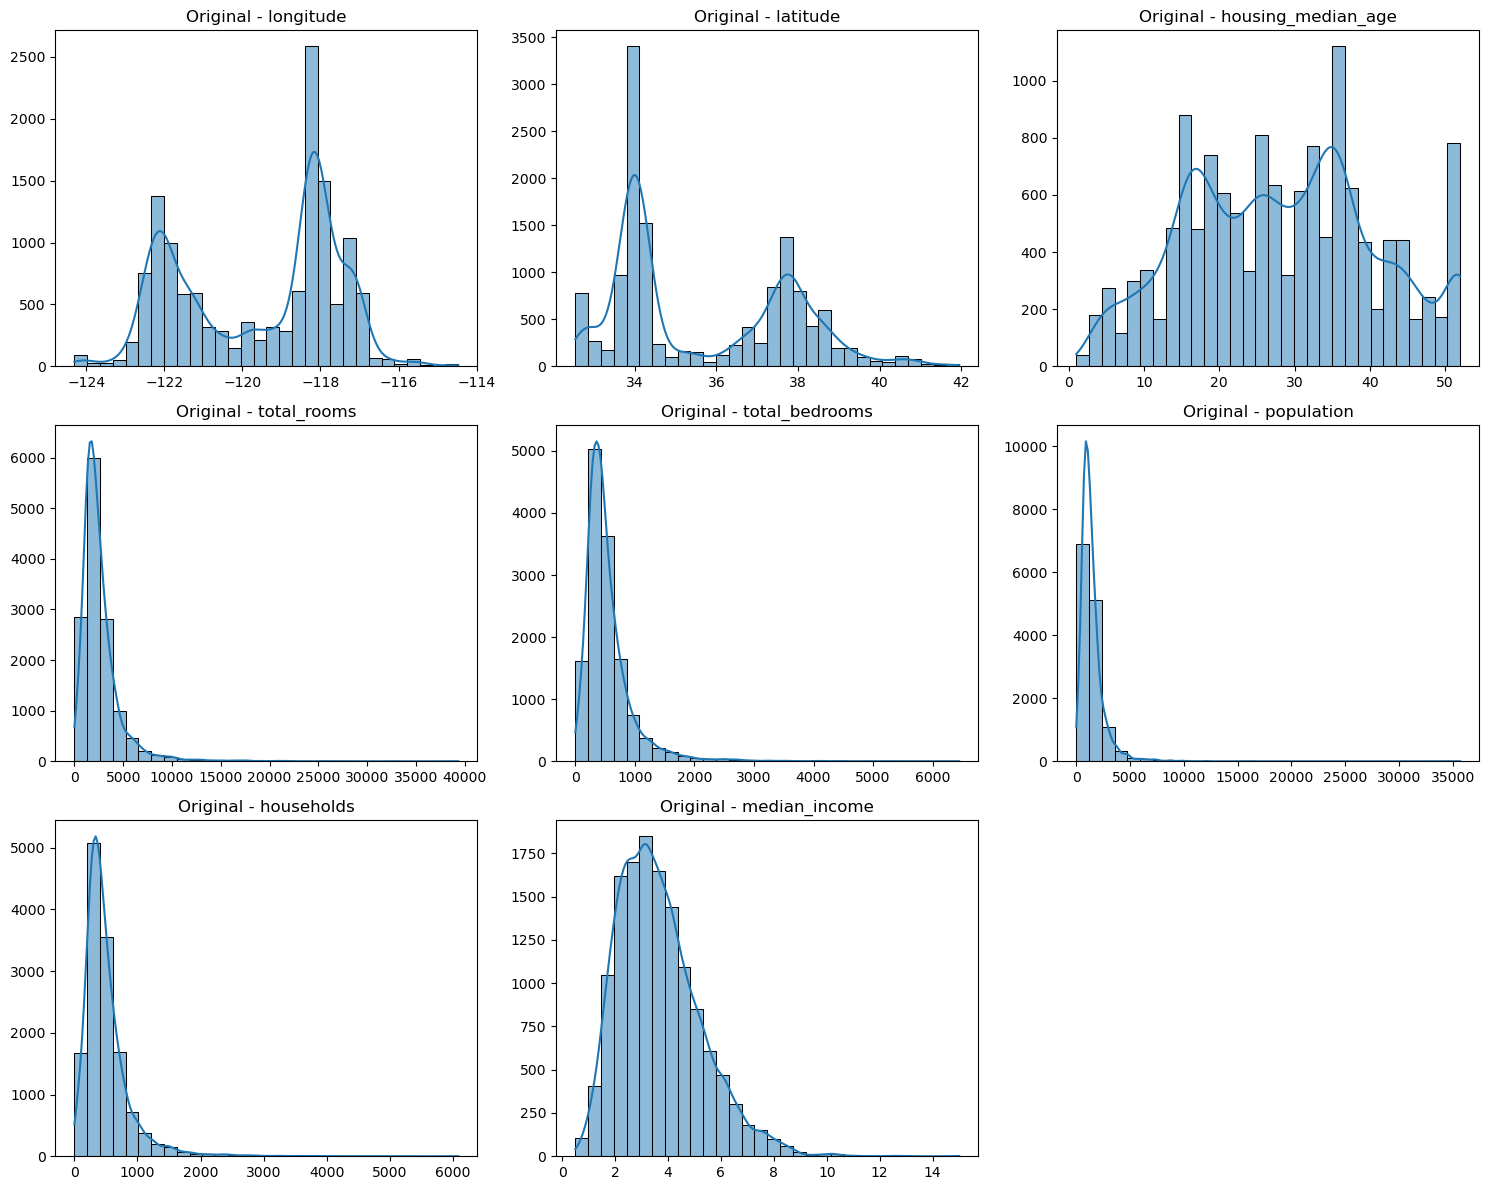

In [39]:
plot_all_histograms(X_train, title_prefix="Original - ")

In [40]:
from scipy.stats import boxcox

In [41]:
y_train_transformed, lambda_y = boxcox(y_train)

In [42]:
def inverse_boxcox(y, lambda_):
    if lambda_ == 0:
        return np.exp(y)
    else:
        return np.power(y * lambda_ + 1, 1 / lambda_)

In [43]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_transformed, y_train_transformed)

LinearRegression()

In [44]:
y_pred_transformed = model.predict(X_test_tranformed)

In [45]:
y_pred_original = inverse_boxcox(y_pred_transformed, lambda_y)

In [46]:
y_pred_transformed

array([82.19450298, 70.00144601, 77.41751772, ..., 70.62202022,
       94.36341921, 81.64384963])

In [47]:
y_pred_original

array([194385.32182164, 106360.5977154 , 155156.10639472, ...,
       109931.01812549, 327641.49437695, 189521.98333346])

In [48]:
from sklearn.metrics import mean_squared_error, r2_score
print("R2 Score:", r2_score(y_test, y_pred_original))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_original))

R2 Score: 0.6278289829574073
Mean Squared Error: 3440000935.8939147


In [49]:
print("R2 Score:", r2_score(y_test, y_pred_transformed))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_transformed))

R2 Score: -3.963763685930358
Mean Squared Error: 45880390850.53872


In [50]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [51]:
y_pred = model.predict(X_test)

In [52]:
print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

R2 Score: 0.6263296157229521
RMSE: 58769.54725739215
